### CODE FOR RANDOM FOREST 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
### DATA
df=pd.read_csv("C:/Users/Jose de Vera/Desktop/AI 201/miniproject/standardized.csv")
input = df.iloc[:,0:4]
output = df.iloc[:,4:]

### SPLIT
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.3, random_state=201)

In [4]:
# Set a range of numbers of trees to try
num_trees_list = range(10, 500, 10)

# Initialize lists to store MSE and number of trees
train_mse_list = []
test_mse_list = []
num_trees_used = []

for num_trees in num_trees_list:
    # Initialize the Random Forest Regressor
    random_forest = RandomForestRegressor(n_estimators=num_trees, random_state=201)

    # Train the ensemble on the training data
    random_forest.fit(x_train, y_train)

    # Make predictions on the test data
    train_predictions = random_forest.predict(x_train)
    test_predictions = random_forest.predict(x_test)

    # Calculate MSE
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Store MSE and number of trees
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    num_trees_used.append(num_trees)

    print(f'Mean Squared Error for {num_trees} Trees: {test_mse}')

# Calculate average MSE
average_mse = np.mean(test_mse)
print(f'Average Mean Squared Error: {average_mse}')

Mean Squared Error for 10 Trees: 1386.420761904762
Mean Squared Error for 20 Trees: 1372.4979047619047
Mean Squared Error for 30 Trees: 1361.306761904762
Mean Squared Error for 40 Trees: 1373.1823273809523
Mean Squared Error for 50 Trees: 1352.4446742857144
Mean Squared Error for 60 Trees: 1329.4752142857142
Mean Squared Error for 70 Trees: 1328.5714829931972
Mean Squared Error for 80 Trees: 1307.691199404762
Mean Squared Error for 90 Trees: 1290.3927995296885
Mean Squared Error for 100 Trees: 1284.4322580952382
Mean Squared Error for 110 Trees: 1276.6028492719402
Mean Squared Error for 120 Trees: 1274.8967506613758
Mean Squared Error for 130 Trees: 1279.4728515074669
Mean Squared Error for 140 Trees: 1290.2687468415936
Mean Squared Error for 150 Trees: 1299.2474886772486
Mean Squared Error for 160 Trees: 1307.7539575892858
Mean Squared Error for 170 Trees: 1302.5556160817266
Mean Squared Error for 180 Trees: 1303.6865120517343
Mean Squared Error for 190 Trees: 1295.4369067405355
Mean 

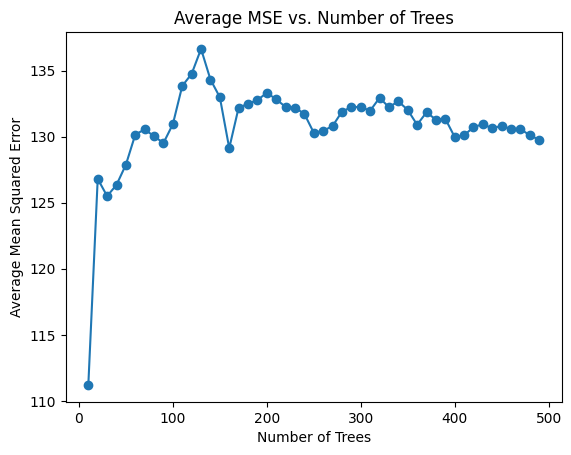

In [5]:
plt.plot(num_trees_used, train_mse_list, marker='o')
plt.title('Average MSE vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Average Mean Squared Error')
plt.show()

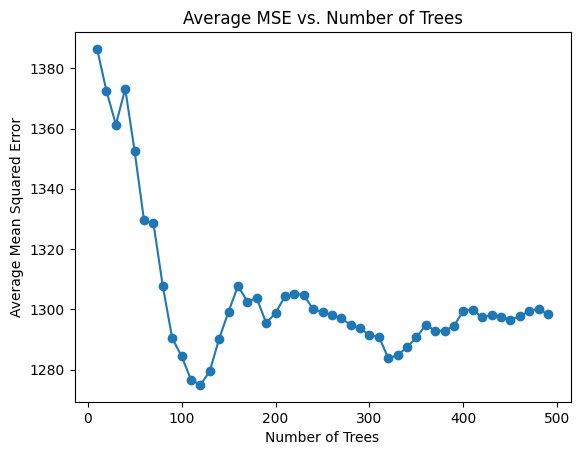

In [6]:
plt.plot(num_trees_used, test_mse_list, marker='o')
plt.title('Average MSE vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Average Mean Squared Error')
plt.show()

In [6]:
random_forest = RandomForestRegressor(n_estimators=120, random_state=201)
# Train the ensemble on the training data
random_forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=201)

In [7]:
y_train_pred = random_forest.predict(x_train)
y_train_pred = pd.DataFrame(y_train_pred, columns=['ThalPredict', 'ChaePredict', 'BactPredict','PseuPredict','CoscPredict'])
y_test_pred = random_forest.predict(x_test)
y_test_pred = pd.DataFrame(y_test_pred, columns=['ThalPredict', 'ChaePredict', 'BactPredict','PseuPredict','CoscPredict'])
y_test_pred

,ThalPredict,ChaePredict,BactPredict,PseuPredict,CoscPredict
0,133.575000,40.941667,20.833333,94.591667,45.441667
1,12.200000,13.033333,6.116667,3.358333,6.450000
2,17.291667,94.850000,29.283333,7.100000,14.500000
3,26.200000,12.600000,6.933333,13.033333,12.375000
4,18.983333,29.958333,12.450000,11.716667,11.525000
5,33.408333,115.191667,27.350000,12.783333,24.616667
6,28.025000,109.841667,29.333333,10.483333,21.683333
7,10.133333,47.775000,15.033333,5.416667,7.408333
8,9.508333,61.558333,18.550000,3.341667,7.016667
9,41.633333,32.091667,15.958333,24.116667,16.258333


In [13]:
# Make predictions on the test data
train_pred = random_forest.predict(x_train)
test_pred = random_forest.predict(x_test)

# Calculate and store the mean squared error
train_mse = mean_squared_error(y_train,train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("train "+str(train_mse)+" test "+str(test_mse))

train 134.7503359375 test 1274.8967506613758


In [8]:
y_train_pred.to_csv("C:/Users/Jose de Vera/Desktop/AI 201/miniproject/rf_train_preds.csv",index=False)
y_test_pred.to_csv("C:/Users/Jose de Vera/Desktop/AI 201/miniproject/rf_test_preds.csv",index=False)

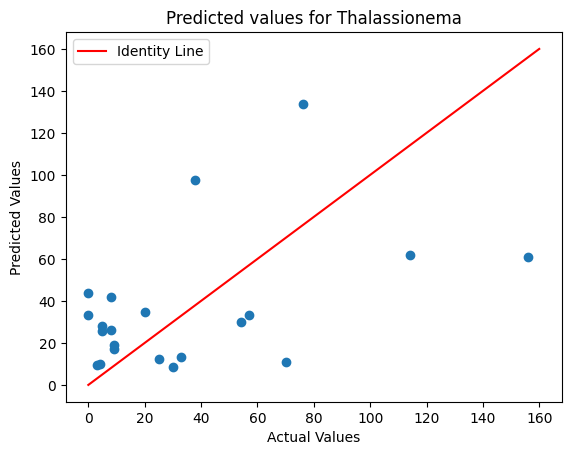

In [9]:
# Plotting the average MSE
xs = np.linspace(0, 160, 100)
plt.plot(xs,xs, label = "Identity Line", c = "red")
plt.scatter(y_test["Thalassionema"], y_test_pred["ThalPredict"])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted values for Thalassionema')
plt.legend()
plt.show()

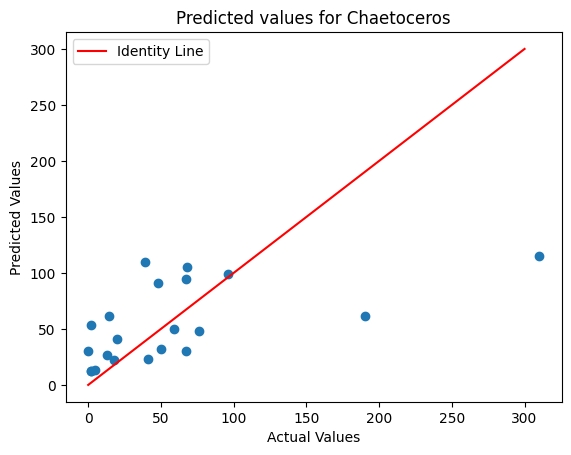

In [9]:
# Plotting the average MSE
xs = np.linspace(0, 300, 100)
plt.plot(xs,xs, label = "Identity Line", c = "red")
plt.scatter(y_test["Chaetoceros"], y_test_pred["ChaePredict"])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted values for Chaetoceros')
plt.legend()
plt.show()

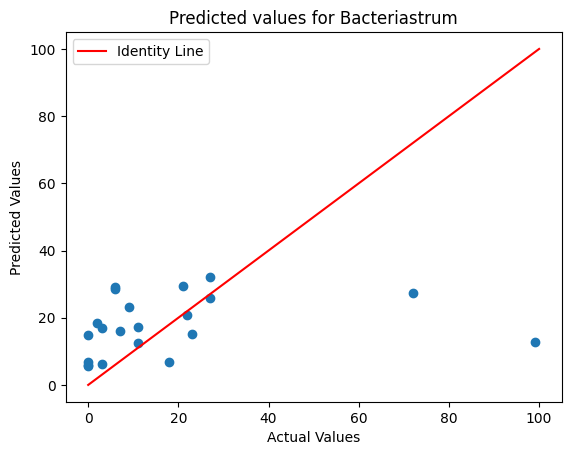

In [67]:
# Plotting the average MSE
xs = np.linspace(0, 100, 100)
plt.plot(xs,xs, label = "Identity Line", c = "red")
plt.scatter(y_test["Bacteriastrum"], y_test_pred["BactPredict"])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted values for Bacteriastrum')
plt.legend()
plt.show()

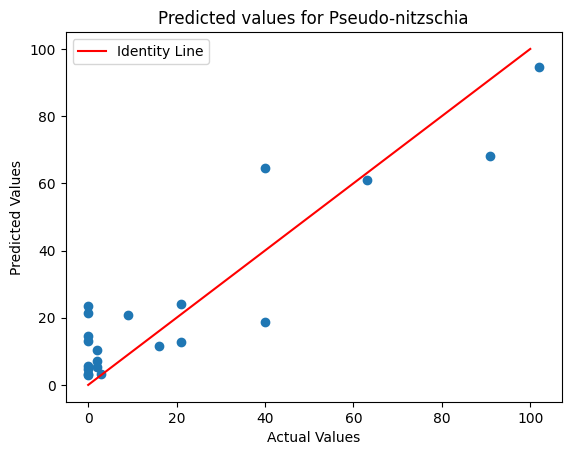

In [68]:
# Plotting the average MSE
xs = np.linspace(0, 100, 100)
plt.plot(xs,xs, label = "Identity Line", c = "red")
plt.scatter(y_test["Pseudo-nitzschia"], y_test_pred["PseuPredict"])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted values for Pseudo-nitzschia')
plt.legend()
plt.show()

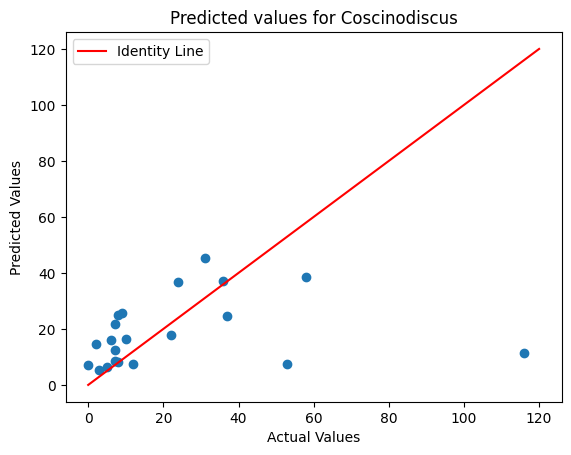

In [10]:
# Plotting the average MSE
xs = np.linspace(0, 120, 100)
plt.plot(xs,xs, label = "Identity Line", c = "red")
plt.scatter(y_test["Coscinodiscus"], y_test_pred["CoscPredict"])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted values for Coscinodiscus')
plt.legend()
plt.show()